### Уровень 0:
Придумать матрицы, которые обладают следующими свойствами:

a) Диагональная, ортогональная, но не единичная(!)

b) Верхнетреугольная, ортогональная

c) Нижнетреугольная, ортогональная

d) Матрица, у которой определитель = 1, и все элементы не равны 0

P.S. Во всех пунктах ответом должна быть ненулевая матрица размерности не менее 2!

Найти собственные значения и собственные вектора матрицы:

m = np.array([[2, 2],
              [1, 3]])
print(m)

In [9]:
import numpy as np
from numpy import linalg
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt 

In [2]:
# а) Диагональная, ортогональная, но не единичная матрица

a = np.array([[-1, 0, 0], [0, -1, 0], [0, 0, -1]])

np.dot(a, a.T)   # Проверка ортогональности

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

#### b, c) Верхнеугольная и нижнеугольная ортогональные матрицы

Ортогональная матрица обладает следующим свойством: сумма квардатов элементов каждой строки/столбца ортогональной матрицы равна 1. 

Это свойство не выполняется для угольных матриц, т.к. сумма квардатов элементов строки со всеми ненулевыми элементами не может быть равна 1 одновремнно с суммой квадратов элементов строки только с одним ненулевым элементом.

Т.о. верхнеугольная/нижнеугольная матрица не может быть ортогональной.

In [3]:
# d) Матрица, у которой определитель = 1, и все элементы не равны 0
b = np.array([[4, 1], [3, 1]])

# определитель матрицы

np.linalg.det(b)

1.0

In [4]:
# Найти собственные значения и собственные вектора матрицы:

m = np.array([[2, 2],
              [1, 3]])
# print(m)

# Собственные значения и вектора матрицы m
w, v = np.linalg.eig(m)
print('Сосбственные значения матрицы m:', w)
print('Сосбственные вектора матрицы m:')
print(v)

Сосбственные значения матрицы m: [1. 4.]
Сосбственные вектора матрицы m:
[[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]


### Уровень 1:
Найти спектральное разложение матрицы:

m = np.array([[1, 2],
              [2,3]])

print(m)


In [5]:
# Спектральное разложение матрицы m
m = np.array([[1, 2],
              [2,3]])

# print(m)

w, v = np.linalg.eig(m)     # Собственные значения и вектора матрицы m
D = np.diag(w)              # Диагональная матрица с собственными значениями


# Спектральное разложение матрицы m
M = np.dot(v, np.dot(v.T, D))

print(M)

[[-2.36067977e-01  4.44089210e-16]
 [ 0.00000000e+00  4.23606798e+00]]


### Построение зависимости качества восстановления рукописных цифр (MNIST) в зависимости от различного количества компонент PCA. В качестве метрики различия использовать MSE





In [10]:
# Загрузка набора данных MNIST
digits = load_digits()

# Размер набора данных
print('Рамер набора данных:', digits.data.shape)

# Количество компонент в исходном изображении
components = 64

# Сопоставелние количество компонент и значения средней квардатической ошибки
components_MSE = {}

Рамер набора данных: (1797, 64)


In [11]:
def MSE(data, components):
    while components > 1:
        components -= 1
        pca = PCA(n_components = components)                 # Создание экземпляра PCA
        digits_transformed = pca.fit_transform(digits.data)        # Снижение размерности данных
        digits_recovered = pca.inverse_transform(digits_transformed)     # Восстановление данных
        MSE = mean_squared_error(digits.data, digits_recovered)       # Средняя квадратическая ошибка
        components_MSE[components] = round(MSE, 2)

In [12]:
MSE(digits.data, components)

<function matplotlib.pyplot.show(close=None, block=None)>

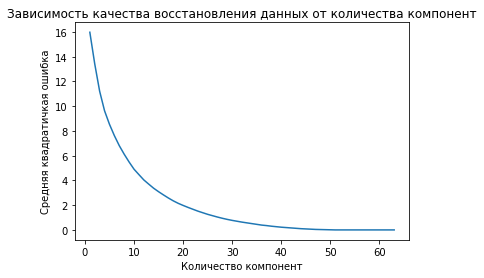

In [13]:
# Зависимость качества восстановления рукописных цифр от количества компонент PCA

plt.plot(components_MSE.keys(), components_MSE.values())
plt.title('Зависимость качества восстановления данных от количества компонент')
plt.xlabel('Количество компонент')
plt.ylabel('Средняя квадратичкая ошибка')
plt.show

Выводы:

Исходный массив имеет 1797 образцов рукописных цифр, размерность каждого элемента - 64 компонента.

Средняя квадратическая ошибка заметно растет при размерности 16-17 компонент и менее.